In [1]:
from settings import *

##### Set global constants for this experiment

In [2]:
delta_t = 0.5
N = 1
L = 100
depth=10
distance=0.9

##### Load observables

In [3]:
Os = all_observables(m=m)
jump_oper_decay = default_jump_operators(m=m, gammas=gammas)
jump_oper_no_decay = no_decay_jump_operators()

##### Make training data

In [4]:
rho0s = random_rho0s(m=m, L=L)
rhoss, ts = solve_lindblad_rho0s(rho0s=rho0s, delta_t=delta_t, N=N, s=system, jump_opers=jump_oper_decay)
training_data = mk_training_data(rhoss=rhoss, Os=Os)

random_rho0s: setting seed=67210


In [5]:
sc.linalg.expm(-1j*delta_t* create_hamiltonian(system).full())

array([[0.87758256-0.47942554j, 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.87758256-0.47942554j,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.87758256-0.47942554j, 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.87758256-0.47942554j]])

##### Create a qubit layout and a parametrized circuit on those qubits

In [6]:
null = qt.Qobj(create_hamiltonian(system).full()*0)
null

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [7]:
qubits = TriangularLayoutAB(m=m, distance=distance)
circuit = SHEA_fac(qubits, H=null, t=delta_t, depth=depth)

<Axes: title={'center': 'Qubit layout'}>

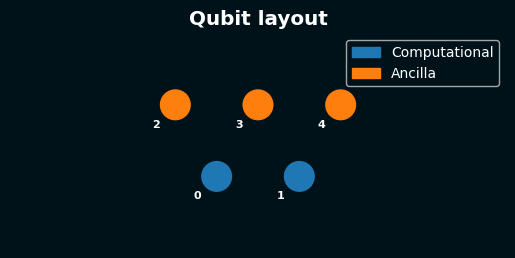

In [8]:
qubits.show_layout()

In [9]:
# optionally load already optimized theta

theta_opt = np.load("losses_theta_opt.npy")

##### Optimize the parameters

In [10]:
theta_opt, errors, thetas = optimize(
    circuit=circuit,
    training_data=training_data,
    n_grad=10,
    max_count=200,
    theta_init=np.ones(circuit.P)
)


# optionally, save the results of the optimization process

theta_opt = np.save("losses_theta_opt.npy", theta_opt)
thetas = np.save("losses_thetas.npy", thetas)
errors = np.save("losses_errors.npy", errors)

optimizer (optimization indices): setting seed=3386


C:\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


-----
        Grad calculation time: 
        155.26802682876587 
        Armijo calculation time: 
        20.56805944442749 
        Total grad descend time: 
        2:55.84


In [11]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

Text(0, 0.5, 'error')

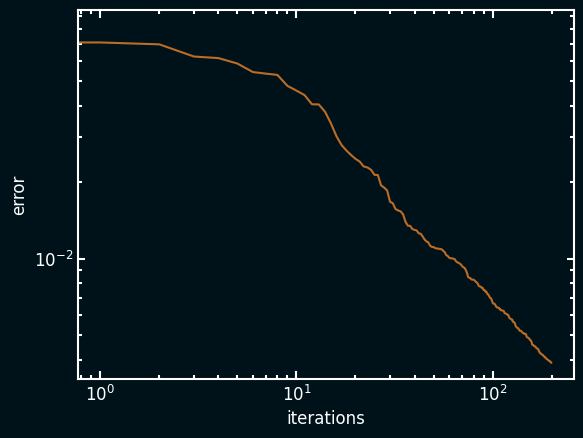

In [12]:
plt.loglog(errors)
plt.xlabel("iterations")
plt.ylabel("error")

##### Plot approximated solution compared to reference solution

In [17]:
n_time_steps = 20

rho0 = rho_rand_haar(m=m)

Os_comp = [O.full() for O in create_observables_comp_basis(m=m)]

rho_rand_haar: seed=50857


In [18]:
# calculate reference solution

rhos_ref, ts = solve_lindblad_rho0(rho0, 
                                delta_t=delta_t, 
                                N=n_time_steps, 
                                s=system, 
                                jump_opers=jump_oper_decay,
                                )
Ess_ref = measure_rhos([r.full() for r in rhos_ref], Os_comp)

# calculate approximated solution

evolver = evolver_fac(circuit, theta_opt)
rhos_approx = evolver(n=n_time_steps, rho=rho0.full())
Ess_approx = measure_rhos(rhos_approx, Os_comp)

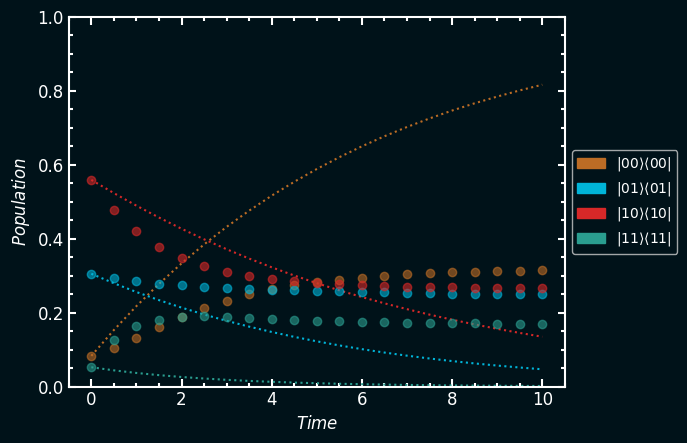

In [19]:
plot_ref(ts, Ess_ref)
plot_approx(ts, Ess_approx)

plt.ylabel("$Population$")
plt.xlabel("$Time$")
plt.ylim(0, 1)
plt.gca().legend(handles=legend_comp(m), loc="center left", bbox_to_anchor=(1, 0.5))

In [16]:
theta_opt

array([1.03978516, 0.94063665, 1.        , 1.        , 1.        ,
       0.74094291, 0.8723876 , 1.35951146, 1.1653438 , 1.3012864 ,
       0.97378346, 0.81113949, 1.23485887, 1.12967065, 1.26482457,
       0.62376316, 1.20650945, 1.07189562, 1.00115002, 1.13676616,
       0.96867401, 0.93814153, 0.88557103, 1.01421716, 0.8962525 ,
       1.06489075, 1.36728225, 1.14101187, 0.87922529, 1.13895438,
       0.89716192, 1.01416959, 0.76346262, 0.95551221, 1.29202552,
       0.86975857, 1.29463561, 0.90576335, 0.8619401 , 0.94063713,
       1.02035167, 0.9209865 , 0.97236973, 0.89726951, 1.0980208 ,
       1.03041133, 1.15265064, 1.09868255, 1.13719962, 1.0669094 ,
       0.94393407, 0.91795748, 1.12068595, 1.11214697, 1.12240777,
       1.10411065, 0.93149695, 1.18904317, 0.34414977, 0.76065018,
       1.13764054, 1.07387683, 1.07197091, 0.94850782, 0.9965131 ,
       1.05608326, 1.04152237, 0.90948314, 1.17848816, 0.99848081,
       0.91537381, 1.14726104, 0.84277824, 1.15411798, 0.90450